----

# Análisis de los datos

En esta sección vamos a tomar las tablas que obtuvimos anteriormente para poder hacer el respectivo análisis. 

Comenzaremos con un análisis exploratoria de nuestros datos. Buscaremos posibles fallas en las tablas que necesitemos corregir y las corregiremos. 

Cuando tengamos todo listo, haremos el respectivo análisis de nuestros datos para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. 

También probaremos la siguiente hipótesis:

- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".


## Análisis Exploratorio

In [7]:
# Importamos todas las librerías que usaremos en el proyecto

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st 
from scipy.stats import levene

In [2]:
# Definimos una función para analizar los outliers de nuestras tablas.

def outliers(df,col,ylabel):
    df.boxplot(col,figsize=(8,5))
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'El IQR de {col} es {IQR}')
    print()

    if low_limit < 0:
        print(f'La cantidad de valores iguales o menores a {min} es {values_0}')
        print()
        print(f'El porcentaje de valores iguales o menores a {min} es {percentage_values_0}')
    else:
        print(f'La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}')
        print()
        print(f'El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}')

    print()
    print(f'EL limite superior es de nuestro boxplot es {up_limit}')
    print()
    print(f'La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}')
    print()
    print(f'Elporcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}')

In [8]:
# Importamos las tablas que vamos a utilizar 
current_directory = os.getcwd()

trips_path = os.path.join(current_directory, '..', 'data', 'moved_project_sql_result_01.csv')
neighborhoods_path = os.path.join(current_directory, '..', 'data', 'moved_project_sql_result_04.csv')

trips = pd.read_csv(trips_path)
neighborhoods = pd.read_csv(neighborhoods_path)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ZonaDigital\\Documents\\1. Triple Ten\\Data Scientist\\SPRINT 6\\Proyecto\\..\\data\\moved_project_sql_result_01.csv'

### Trips

In [4]:
# Analizamos la tabla trips

trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
trips.tail()

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
# Total de compañías

len(trips['company_name'].unique())

64

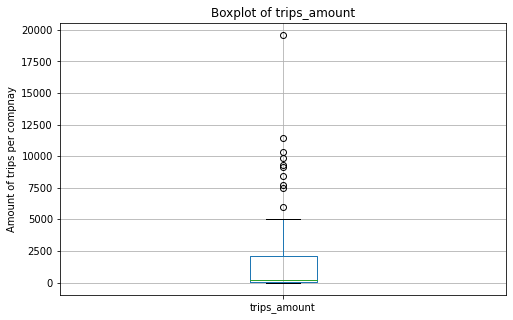

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

El IQR de trips_amount es 2085.75

La cantidad de valores iguales o menores a 2 es 0

El porcentaje de valores iguales o menores a 2 es 0.00%

EL limite superior es de nuestro boxplot es 4192.25

La cantidad de volores iguales o superiores a 4192.25 es 12

Elporcentaje de valores iguales o superiores a 4192.25 es 18.75%


In [8]:
outliers(trips,'trips_amount', 'Amount of trips per compnay')

**Conclusiones**

Podemos ver que en nuestra tabla ‘trips’ tenemos solo dos columnas. Una de ellas nos indica los nombres de las empresas de taxi, en total tenemos 64 empresas de taxi, y la otra nos indica la cantidad de viajes de los taxis de esa empresa. 

No tenemos valores ausentes en la tabla entonces no es necesario hacer algún ajuste en este campo. 

Los tipos de datos están correctos entonces tampoco necesitamos hacer ningún cambio. 

Al hacer nuestro análisis de outliers podemos observar que la mayoría de nuestros valores se encuentran entre 2 y 4192.25 viajes. El porcentaje de viajes menores a 2 es bastante menor. Sin embargo, el porcentaje de valores mayores a 4192.25 es más significativo. Podríamos decir que todos los valores por debajo de 2 y por encima de 4192 son outsiders.


### Neighborhoods

In [9]:
# Analizamos la tabla neighborhoods

neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
neighborhoods.tail()

,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


In [11]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


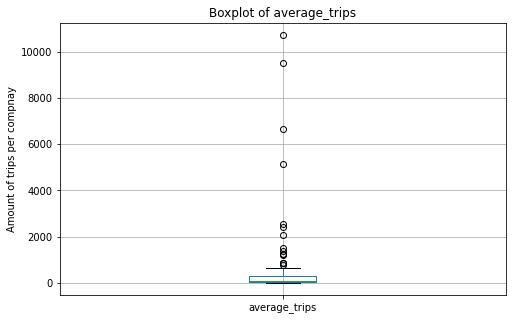

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

El IQR de average_trips es 284.5916666666667

La cantidad de valores iguales o menores a 1.8 es 0

El porcentaje de valores iguales o menores a 1.8 es 0.00%

EL limite superior es de nuestro boxplot es 583.45

La cantidad de volores iguales o superiores a 583.45 es 17

Elporcentaje de valores iguales o superiores a 583.45 es 18.09%


In [12]:
outliers(neighborhoods,'average_trips', 'Amount of trips per compnay')

**Conclusiones**

Al igual que nuestra tabla anterior esta tiene solo dos columnas. Una de ellas nos muestra los nombres de los lugares donde han terminado los viajes y el promedio de viajes que han terminado en este sector. 

No tenemos valores ausentes. 

No tenemos duplicados. 

Los tipos de datos están correctos para cada columna. 

En el análisis de valores ausentes también vemos posibles outliers. La mayoría de nuestros datos se encuentra entre 1.80 y 583.45 de promedio de viajes. Podríamos decir que todos los valores por debajo de 1.80 y por encima de 538.45 son outliers. Vemos que tenemos sectores con promedios bastantes elevados de hasta 10000 y más. 


## Análisis de datos 

En esta sección vamos a analizar los lugares más visitados y las empresas de taxis con más viajes. 

### Neighborhoods

In [13]:
# 10 principales barrios en terminos de finalizacion

neighborhoods.sort_values('average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


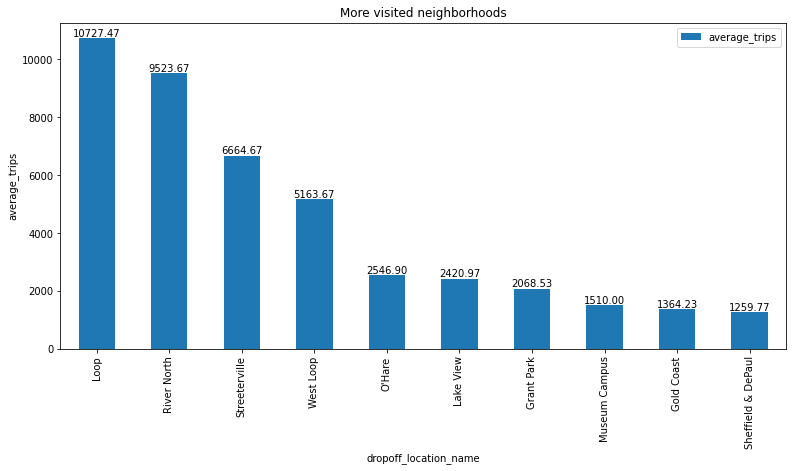

In [14]:
neighborhoods_1 = neighborhoods.sort_values('average_trips', ascending=False).head(10)

ax = neighborhoods_1.plot(kind='bar', x='dropoff_location_name', figsize=(13,6))

for i, value in enumerate(neighborhoods_1['average_trips']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('More visited neighborhoods')
plt.ylabel('average_trips')
plt.show()

**Conclusiones**

En el gráfico y en nuestra lista podemos ver claramente cuáles de los 94 vecindarios son los más visitados. Vemos que los primeros cuatro van desde las 5000 visitas hasta los más de 10000 y los otras 6 están entre los 1250 y 2500. Los 4 barrios más visitados son Loop, River North, Streeterville, y West Loop. 

### Trips

In [15]:
# 10 empresas de taxis con mas viajes

trips.sort_values('trips_amount', ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


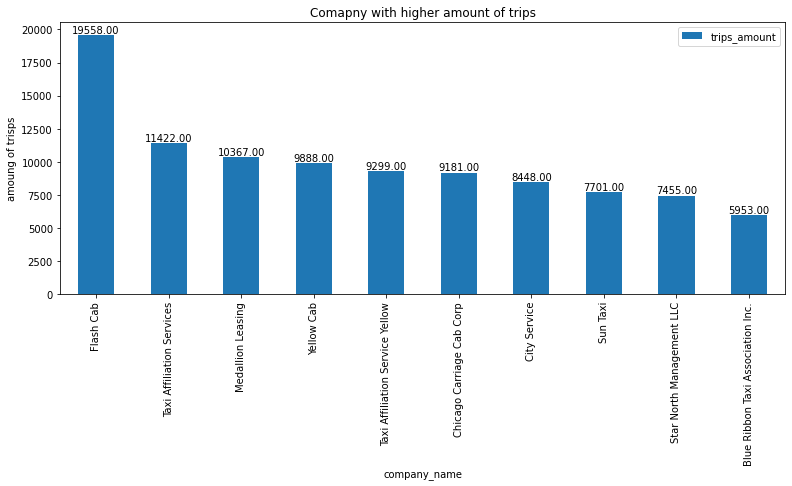

In [16]:
trips_1 = trips.sort_values('trips_amount', ascending=False).head(10)

ax = trips_1.plot(kind='bar', x='company_name', figsize=(13,5))

for i, value in enumerate(trips_1['trips_amount']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Comapny with higher amount of trips')
plt.ylabel('amoung of trisps')
plt.show()

**Conclusiones**

Al igual que con los vecindarios organizamos nuestra tabla para obtener las 10 compañías de taxis con más viajes. Podemos ver claramente que Flash Cab le lleva una gran ventaja a los demás. La diferencia entre Flash Cab y el segundo en esta lista, Taxi Affiliation Services es casi del doble. Las cuatro companias con mas viajes son Flash Cab, Taxi Affiliation Services, Medallion Leasing, y Yellow Cab. 

## Prueba de hipótesis

Para nuestra prueba de hipótesis vamos a usar una tercera tabla. En esta tabla tenemos la fecha de cuando se realizó el viaje, el clima, y la duración del viaje. Vamos probar la siguiente hipótesis:

$H_O$ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos

$H_a$ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

 &#945; = 0.05

In [17]:
# Importamos la tabla y la imprimimos 

duration = pd.read_csv('/datasets/project_sql_result_07.csv')
duration.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


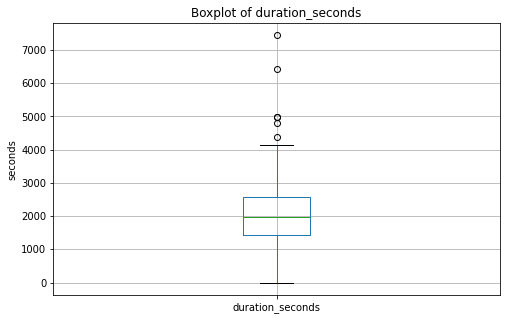

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

El IQR de duration_seconds es 1141.75

La cantidad de valores iguales o menores a 296.5 es 7

El porcentaje de valores iguales o menores a 296.5 es 0.66%

EL limite superior es de nuestro boxplot es 3721.75

La cantidad de volores iguales o superiores a 3721.75 es 16

Elporcentaje de valores iguales o superiores a 3721.75 es 1.50%


In [21]:
outliers(duration,'duration_seconds','seconds')

**Conclusiones**

Podemos ver que tenemos algunos outliers en nuestro dataset para la prueba de hipótesis. Antes de realizar nuestro análisis vamos a descartar los outliers. Al ver nuestro análisis de outliers podemos ver que todos los valores por debajo de 296.5 y por encima de 3721.75 son outliers. Entonces usaremos eso para crear un nuevo dataset si estos valores. 

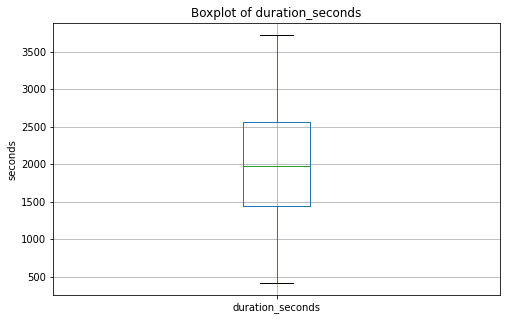

count    1045.000000
mean     2048.350239
std       685.313243
min       420.000000
25%      1439.000000
50%      1978.000000
75%      2563.000000
max      3720.000000
Name: duration_seconds, dtype: float64

El IQR de duration_seconds es 1124.0

La cantidad de valores iguales o menores a 315.0 es 0

El porcentaje de valores iguales o menores a 315.0 es 0.00%

EL limite superior es de nuestro boxplot es 3687.0

La cantidad de volores iguales o superiores a 3687.0 es 2

Elporcentaje de valores iguales o superiores a 3687.0 es 0.19%


In [22]:
# Creamos el nuevo dataset

duration_new = duration.query('duration_seconds > 296.5 and duration_seconds < 3721.75')

outliers(duration_new,'duration_seconds','seconds')

Podemos ver en nuestra imagen que hemos eliminado la mayoría de los outliers. Ahora podemos trabar en nuestra prueba de hipótesis. 

p value:0.0002
Reject null hypothesis >> The data is not normally distributed


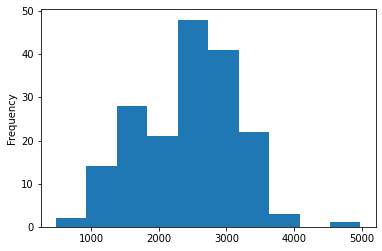

In [23]:
# Shapiro test para saber si la distribucion de cada uno es normal 

test_stat_normality, p_value_normality = st.shapiro(duration_new.query(
    "weather_conditions == 'Bad'")['duration_seconds'])

print("p value:%.4f" % p_value_normality)

if p_value_normality <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
    
# Creamos un gráfico para mostrar la distribución

duration.query("weather_conditions == 'Bad'")['duration_seconds'].plot(kind='hist')
plt.show()

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


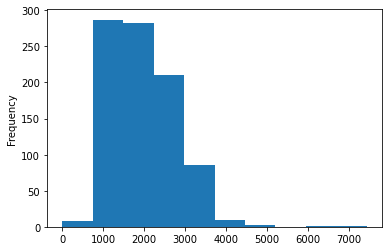

In [24]:
test_stat_normality, p_value_normality = st.shapiro(duration_new.query(
    "weather_conditions == 'Good'")['duration_seconds'])

print("p value:%.4f" % p_value_normality)

if p_value_normality <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
    
# Creamos un gráfico para mostrar la distribución

duration.query("weather_conditions == 'Good'")['duration_seconds'].plot(kind='hist')
plt.show()

**Observaciones**

Vemos que ambas distribuciones no son normales por tanto necesitamos hacer el mannwhitneyu test.

In [20]:
# Hacemos la prueba

alpha = 0.05

results = st.mannwhitneyu(duration_new.query("weather_conditions == 'Bad'")['duration_seconds'],
                       duration_new.query("weather_conditions == 'Good'")['duration_seconds'])

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.716538885593458e-14
Rechazamos la hipótesis nula


**Conclusiones**

Hemos rechazado la hipótesis nula. Podemos decir que tenemos suficiente evidencia para decir que “La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.”

Esto podría deberse a distintos factores como el tráfico que aumenta por el mal clima, accidentes que pueden ocurrir, etc. Esto sería otro tema de análisis. 

## Conclusiones Generales

La tabla trips tiene dos columnas. Una con los nombres de las empresas de taxis y la otra con la cantidad de viajes realizados.

La tabla neighborhoods tiene también dos columnas. Una indicándonos el barrio al que llego el taxi a dejar el pasajero, o destino final del viaje, y el promedio de viajes terminados en este sector. 

No tenemos valores nulos, ni duplicados, ni tipos de datos erróneos en ninguna de las tablas. 

En la tabla trips la mayoría de los valores de viajes por empresa están entre los 2 y 4192.25 viajes. Podríamos decir que todos los valores por debajo de 2 y por encima de 4192 son outsiders.

En la tabla neighborhoods la mayoría de promedios de visitas a cada sector está entre 1.80 y 583.45. Podríamos decir que todos los valores por debajo de 1.80 y por encima de 538.45 son outliers.

Los 4 barrios más visitados son Loop, River North, Streeterville, y West Loop.

El barrio más visitado, Loop, tiene un promedio de 10727 visitas.

Las cuatro companias con más viajes son Flash Cab, Taxi Affiliation Services, Medallion Leasing, y Yellow Cab.

La compañía más visitada, Flash Cab, tiene un total de 19558 viajes. Casi el doble del que está en segundo lugar. 

Hemos rechazado la hipótesis nula. Podemos decir que tenemos suficiente evidencia para decir que “La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.”

Esto podría deberse a distintos factores como el tráfico que aumenta por el mal clima, accidentes que pueden ocurrir, etc. Esto sería otro tema de análisis.
